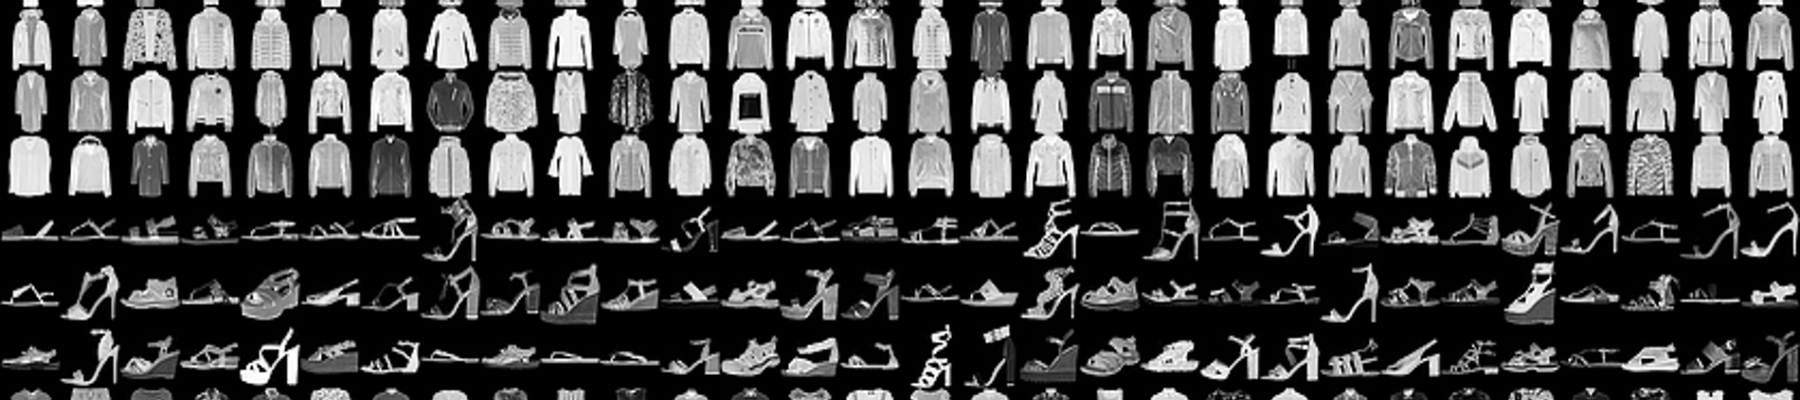

## Imports and load the data

In [1]:
#Imports and load the data csv.
import pandas as pd
import seaborn as sns
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from xgboost import XGBClassifier
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('D:/Fashion-mnist/fashion-mnist_train.csv')

In [3]:
#Look at the Data Head
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
#Checking if have some null values for Clean the data
df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [7]:
#Checking how many rows and columns we have.
df.shape

(60000, 785)

In [8]:
#how many Edible, Poisonous we have in the data set.
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [10]:
X = df.drop('label',axis = 1)
y = df['label']
#X_test = dftest.drop('label',axis = 1)
#y_test = dftest['label']

X.shape , y.shape

((60000, 784), (60000,))

## Check for null values

In [13]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
# define the coloums names
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return col_names[label]
get_label_cls(3)

'Dress'

## Reshape for $(X,28,28)$

In [15]:
x_train_reshape = X.values.reshape(-1,28,28)
#x_test_reshape = X_test.values.reshape(-1,28,28)
x_train_reshape.shape

(60000, 28, 28)

## Visualisation 

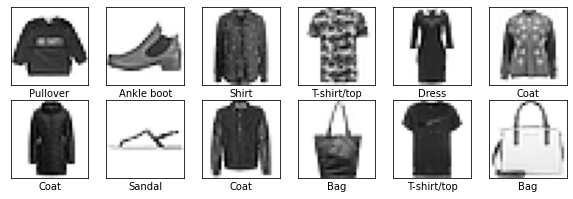

In [17]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='Greys')
    plt.xlabel(col_names[y[i]])
plt.show()

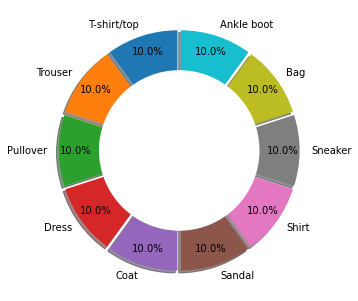

In [18]:
plt.figure(figsize = (5,5))
#explsion
plt.pie(df['label'].value_counts(), labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Split the data to train and test

In [20]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Normalize the train and dataset

In [22]:
#normalize our train and test dataset so that our models converge faster.
X_train = X_train / 255.
X_test = X_test / 255.

In [23]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
38696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
13611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
35213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
31766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,...,0.0,0.0,0.003922,0.0,0.043137,0.145098,0.023529,0.0,0.0,0.0


## Random Forest 

In [24]:
#random forest classifier model.
start = time.time()
RFC = RandomForestClassifier(n_estimators=180, max_depth=50, random_state=12, n_jobs=-1)
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))
time.time() - start

RandomForestClassifier Accuracy is: 0.88225


22.84619426727295

In [25]:
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1232
           1       0.99      0.96      0.98      1174
           2       0.79      0.83      0.81      1200
           3       0.87      0.92      0.89      1242
           4       0.77      0.83      0.80      1185
           5       0.96      0.96      0.96      1141
           6       0.75      0.59      0.66      1243
           7       0.94      0.94      0.94      1224
           8       0.95      0.98      0.97      1149
           9       0.96      0.96      0.96      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



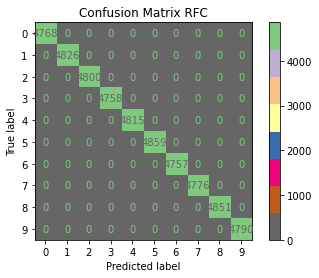

In [26]:
plot_confusion_matrix(RFC, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [27]:
RFC_train_acc = (RFC.predict(X_train) == y_train).mean().round()
print("Training Accuracy =", RFC_train_acc)

Training Accuracy = 1.0


## XGB Classifier

In [28]:
#XGBClassifier model.
start = time.time()
XGB = XGBClassifier(n_estimators=180, max_depth=12, use_label_encoder =False, eval_metric='mlogloss', n_jobs=-1)
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)
print('XGBClassifier Accuracy is: {}'.format(XGB.score(X_test,y_test)))
time.time()-start

XGBClassifier Accuracy is: 0.9008333333333334


804.2815911769867

In [29]:
XGB_train_acc = (XGB.predict(X_train) == y_train).mean().round()
print("Training Accuracy =", XGB_train_acc)

Training Accuracy = 1.0


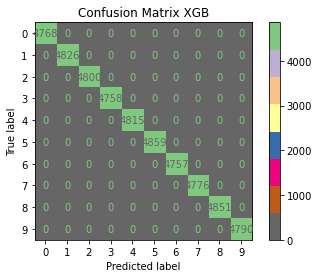

In [30]:
plot_confusion_matrix(XGB, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix XGB')
plt.show()

## KNN Classifier

In [31]:
#knn classifier with for loop [1-5] to check the best accuracy of n
K = list(range(1, 12))
scores = []
for n in K:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test,y_test))
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 0.8485833333333334
KNeighborsClassifier: n = 2 , Accuracy is: 0.8449166666666666
KNeighborsClassifier: n = 3 , Accuracy is: 0.8561666666666666
KNeighborsClassifier: n = 4 , Accuracy is: 0.8550833333333333
KNeighborsClassifier: n = 5 , Accuracy is: 0.8558333333333333
KNeighborsClassifier: n = 6 , Accuracy is: 0.8574166666666667
KNeighborsClassifier: n = 7 , Accuracy is: 0.8551666666666666
KNeighborsClassifier: n = 8 , Accuracy is: 0.8545
KNeighborsClassifier: n = 9 , Accuracy is: 0.8530833333333333
KNeighborsClassifier: n = 10 , Accuracy is: 0.8524166666666667
KNeighborsClassifier: n = 11 , Accuracy is: 0.8486666666666667


Text(0, 0.5, 'Accuracy')

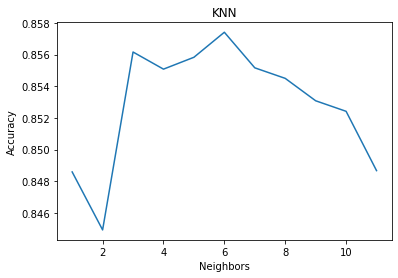

In [32]:
plt.plot(K, scores)
plt.title("KNN")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

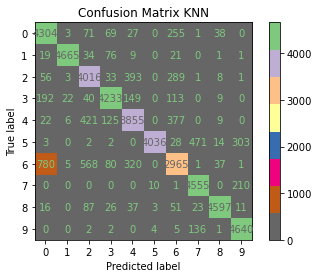

In [33]:
plot_confusion_matrix(knn, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix KNN')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(6,knn.score(X_test,y_test)))

KNeighborsClassifier: n = 6 , Accuracy is: 0.8574166666666667


## Classification report

In [35]:
RFC_REPORT_F = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1232
           1       0.99      0.96      0.98      1174
           2       0.79      0.83      0.81      1200
           3       0.87      0.92      0.89      1242
           4       0.77      0.83      0.80      1185
           5       0.96      0.96      0.96      1141
           6       0.75      0.59      0.66      1243
           7       0.94      0.94      0.94      1224
           8       0.95      0.98      0.97      1149
           9       0.96      0.96      0.96      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



## Summary  accuracy of the models

In [36]:
def floor(k):
  return (math.floor(k*10000)/10000)

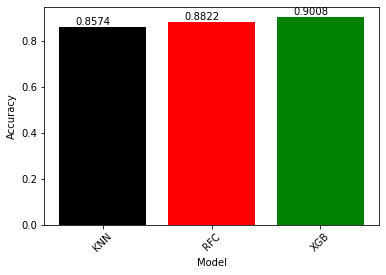

In [39]:
plt.bar(['KNN','RFC','XGB'],[knn.score(X_test,y_test),RFC.score(X_test,y_test),XGB.score(X_test,y_test)], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
for i, v in enumerate([floor(knn.score(X_test,y_test)),floor(RFC.score(X_test,y_test)),floor(XGB.score(X_test,y_test))]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
xlocs, xlabs = plt.xticks()
plt.show()

In [35]:
scl = preprocessing.StandardScaler().fit(X_train)
X_scl = scl.transform(X_train)

## PCA - train & test 

In [40]:
PCA = pca(n_components = 0.9, random_state= 0, svd_solver='full')

X_Train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.transform(X_test)

print('Number of components is: {}'.format(PCA.n_components_))

Number of components is: 84


## XGB Classifier with PCA

In [41]:
#XGBClassifier model.
start = time.time()
XGB_PCA = XGBClassifier(n_estimators=180, max_depth=3, random_state=12, use_label_encoder =False, eval_metric='mlogloss',n_jobs=-1)
XGB_PCA.fit(X_Train_PCA, y_train)
y_predict = XGB_PCA.predict(X_test_PCA)
print('XGBClassifier Accuracy is: {}'.format(XGB_PCA.score(X_test_PCA,y_test)))
time.time()-start

XGBClassifier Accuracy is: 0.87


207.94835495948792

In [72]:
start = time.time()
param_grid = {'max_depth':[3,6,9],'num_class': [3], 'learning_rate':[0.001,0.005,0.001, 0.03, 0.1],'n_estimators':[150,200,250,300],'colsample_bytree':[0.3,0.7]}
xgb_c = XGBClassifier(objective='multi:softmax',n_jobs=-1,gamma=0,colsample_bytree=0.8)

XGBGridsearch = RandomizedSearchCV(estimator=xgb_c,param_distributions=param_grid,verbose=3,scoring='accuracy',n_jobs=-1,cv=5,n_iter=15)
XGBGridsearch.fit(X_Train_PCA,y_train)
time.time()-start

Fitting 5 folds for each of 15 candidates, totalling 75 fits


D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


13108.072270393372

In [73]:
XGBGridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
#XGBClassifier model.
start = time.time()
XGB_bestest = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=300, n_jobs=-1,eval_metric='mlogloss', num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB_bestest.fit(X_Train_PCA, y_train)
y_predict = XGB_bestest.predict(X_test_PCA)
print('XGBClassifier Accuracy is: {}'.format(XGB_bestest.score(X_test_PCA,y_test)))
time.time()-start

XGBClassifier Accuracy is: 0.8838333333333334


352.6952543258667

## Random Forest Classifier with PCA

In [42]:
#random forest classifier model.
start = time.time()
RFC_PCA = RandomForestClassifier(n_estimators=180, max_depth=3, random_state=12,n_jobs=-1)
RFC_PCA.fit(X_Train_PCA, y_train)
y_predict = RFC_PCA.predict(X_test_PCA)
print('RandomForestClassifier Accuracy is: {}'.format(RFC_PCA.score(X_test_PCA,y_test)))
time.time()-start

RandomForestClassifier Accuracy is: 0.72525


4.391700267791748

In [43]:
start = time.time()
forest_params = {'n_estimators':[100,200,400], 'max_depth':[None,30,100],'max_features':['auto','sqrt','log2'],'random_state':[0]}
forest_grid_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),forest_params,cv=3,scoring='accuracy',return_train_score=True,random_state=0)
forest_grid_search.fit(X_Train_PCA,y_train)
(time.time()-start) / 60

10.932003215948741

In [44]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=400,
                       n_jobs=-1, random_state=0)

In [45]:
#random forest classifier model.
start = time.time()
RFC_bestest = RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=400,
                       n_jobs=-1, random_state=0)
RFC_bestest.fit(X_Train_PCA, y_train)
y_predict = RFC_bestest.predict(X_test_PCA)
print('RandomForestClassifier Accuracy is: {}'.format(RFC_bestest.score(X_test_PCA,y_test)))
time.time()-start

RandomForestClassifier Accuracy is: 0.8689166666666667


28.138922691345215

In [46]:
#knn classifier with for loop [1-5] to check the best accuracy of n
K = list(range(1, 11))
scores = []
for n in K:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_Train_PCA, y_train)
    y_pred = knn.predict(X_Train_PCA)
    scores.append(knn.score(X_test_PCA,y_test))
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test_PCA,y_test)))

KNeighborsClassifier: n = 1 , Accuracy is: 0.8490833333333333
KNeighborsClassifier: n = 2 , Accuracy is: 0.845
KNeighborsClassifier: n = 3 , Accuracy is: 0.85925
KNeighborsClassifier: n = 4 , Accuracy is: 0.8603333333333333
KNeighborsClassifier: n = 5 , Accuracy is: 0.8615833333333334
KNeighborsClassifier: n = 6 , Accuracy is: 0.8604166666666667
KNeighborsClassifier: n = 7 , Accuracy is: 0.8586666666666667
KNeighborsClassifier: n = 8 , Accuracy is: 0.8600833333333333
KNeighborsClassifier: n = 9 , Accuracy is: 0.8585833333333334
KNeighborsClassifier: n = 10 , Accuracy is: 0.8584166666666667


Text(0, 0.5, 'Accuracy')

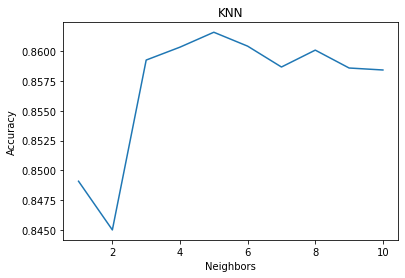

In [47]:
plt.plot(K, scores)
plt.title("KNN")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_Train_PCA, y_train)
y_pred = knn.predict(X_Train_PCA)
print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(5,knn.score(X_test_PCA,y_test)))

KNeighborsClassifier: n = 5 , Accuracy is: 0.8615833333333334


In [49]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_Train_PCA, y_train)
GNB_P = GNB.predict(X_Train_PCA)
print('GaussianNB Accuracy is: {}'.format(GNB.score(X_test_PCA,y_test)))

GaussianNB Accuracy is: 0.7711666666666667


In [50]:
param_grid_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}
GNB_grid_search = RandomizedSearchCV(GaussianNB(),param_grid_GNB,cv=3,scoring='accuracy',return_train_score=True,random_state=0)
GNB_grid_search.fit(X_Train_PCA,y_train)

RandomizedSearchCV(cv=3, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=0, return_train_score=True, scoring='accuracy')

In [51]:
GNB_grid_search.best_estimator_

GaussianNB(var_smoothing=1e-05)

In [52]:
GNB_bestest = GaussianNB(var_smoothing=1e-05)
GNB_bestest.fit(X_Train_PCA, y_train)
GNB_P = GNB_bestest.predict(X_Train_PCA)
print('GaussianNB Accuracy is: {}'.format(GNB_bestest.score(X_test_PCA,y_test)))

GaussianNB Accuracy is: 0.7713333333333333


In [76]:
start = time.time()
estimators = [('RFC',RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=400,n_jobs=-1, random_state=0)),
              ('XGB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=300, n_jobs=-1,eval_metric='mlogloss', num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
time.time() - start

0.0009975433349609375

In [77]:
start = time.time()
clf.fit(X_Train_PCA,y_train)
time.time() - start

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

1822.717701435089

In [78]:
print('StackingClassifier Accuracy is: {}'.format(clf.score(X_test_PCA,y_test)))

StackingClassifier Accuracy is: 0.88325


In [61]:
from sklearn.ensemble import BaggingClassifier
start = time.time()
bagging = BaggingClassifier(base_estimator=clf, n_jobs=-1)
bagging.fit(X_Train_PCA, y_train)
time.time()-start

7700.571001768112

In [62]:
y_pred = bagging.predict(X_test_PCA)
print('Bagging with stacking Accuracy is: {}'.format(bagging.score(X_test_PCA,y_test)))

Bagging with stacking Accuracy is: 0.87425


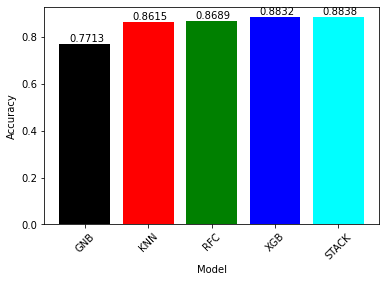

In [84]:
plt.bar(['GNB','KNN','RFC','XGB','STACK'],[GNB_bestest.score(X_test_PCA,y_test),knn.score(X_test_PCA,y_test),RFC_bestest.score(X_test_PCA,y_test),clf.score(X_test_PCA,y_test),XGB_bestest.score(X_test_PCA,y_test)], color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
for i, v in enumerate([floor(GNB_bestest.score(X_test_PCA,y_test)),floor(knn.score(X_test_PCA,y_test)),floor(RFC_bestest.score(X_test_PCA,y_test)),floor(clf.score(X_test_PCA,y_test)),floor(XGB_bestest.score(X_test_PCA,y_test))]):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
xlocs, xlabs = plt.xticks()
plt.show()

In [80]:
dftest = pd.read_csv('D:/Fashion-mnist/fashion-mnist_test.csv')
X_testd = dftest.drop('label',axis = 1)
y_testd = dftest['label']
X_testd = X_testd/255

In [81]:
X_testr = PCA.transform(X_testd)

In [83]:
Model = clf.predict(X_testr)
print('Model Accuracy is on the test with PCA of 84 components: {}'.format(XGB_bestest.score(X_testr,y_testd)))

Model Accuracy is on the test with PCA of 84 components: 0.8872


## The final model on the test (dataset) gives us Accuracy of $0.8872$ with $84$ components 